### 1. Data Import and Base Variable 확인
#### 1) Data Import and DataFrame
* 데이터 분석을 위해, dataframe을 생성하는 가장 일반적인 방법
    * notebook 파일을 생성한 폴더에 분석하고자 하는 data파일을(e.g. csv) 옮겨둔다.
    * data를 notebook으로 import.
    * pandas 명령어로 data를 dataframe으로 생성.
    * *tip : github는 push 할 수 있는 파일 1개 최대 용량이 100mb이므로 csv파일을 push할 경우 error발생  
github에 csv은 push 못하므로, csv 파일은 add 하지말고 ipynb(주피터노트북파일 확장자) 파일만 add *
***
* 바로 dataframe을 만들지 않는 이유
    * df을 여러 종류 만들 가능성(dfx,dfy 등)이 있기 때문에 이를 구분하기 위함  
    * 또한 사용된 dataframe이 어떤 주제 및 소재인지를 표시
     ***
    * data를 dataframe으로 직접 생성  
    df = pd.read_csv('train.csv')  
    ***
    * data와 dataframe을 각각 생성  
    아래에서 사용되는 df은 taxi와 관련된 data로 만들어진 dataframe이다.  
    *taxi를 dataframe의 name으로는 못 씀.   이미 data를 taxi로 정의함  
    하나의 이름을 data로 쓰는 경우와 dataframe으로 쓰는 경우를 명확하게 구분하기 위함*  
    taxi = 'train.csv'  
    df = pd.read_csv(taxi)
    ***

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
taxi = 'train.csv' # data import
df = pd.read_csv(taxi) # dataframe 생성

#### 2) DataFrame 구조 및 변수정보
##### (1) data 및 dataframe
 - shape           : row, column 개수 확인
 - head(), tail()  : 데이터 확인
 - describe()      : 각 column별 간략한 통계정보 
 - info()          : 각 column별 타입 정보
 
##### (2) 변수정보
 * id : 식별자 for each trip
 * vendor_id : 공급자 코드(a code indicating the provider associated with the trip record)
 * pickup_datetime : 탑승 날짜 및 시각(date and time when the meter was engaged)
 * dropoff_datetime : 하차 날짜 및 시각(date and time when the meter was disengaged)
 * passengers in the vehicle : 승객수(driver entered value)
 * pickup_longitude : 탑승 경도(the longitude where the meter was engaged)
 * pickup_latitude : 탑승 위도(the latitude where the meter was engaged)
 * dropoff_longitude : 하차 경도(the longitude where the meter was disengaged)
 * dropoff_latitude : 하차 위도(the latitude where the meter was disengaged)
 * store_and_fwd_flag : 차량메모리 보관여부(this flage indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server. Y = store and forward, N = not a store and forward trip)
 * trip_duration : duration of the trip in seconds

In [3]:
df.shape # observation 및 column(변수) 갯수 확인

(701778, 11)

In [ ]:
df.head() # data확인(head() 위 5개, tail() 아래 5개)

In [4]:
df.describe() # 변수별 기초통계량 확인(mean과 50%비교, real변수와 category변수 확인)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,701778.000000,701778.000000,701778.000000,701778.000000,701778.000000,701778.000000,7.017780e+05
mean,1.536037,1.666577,-73.973665,40.750969,-73.973583,40.751836,9.387318e+02
std,0.498700,1.319466,0.043910,0.033139,0.044214,0.037572,6.772504e+03
min,1.000000,0.000000,-78.547401,34.359695,-79.817978,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991829,40.737400,-73.991325,40.735959,3.900000e+02
50%,2.000000,1.000000,-73.981789,40.754150,-73.979828,40.754478,6.480000e+02
75%,2.000000,2.000000,-73.967567,40.768246,-73.963249,40.769691,1.047000e+03
max,2.000000,8.000000,-61.335529,43.486885,-61.335529,43.674000,3.526282e+06


In [5]:
df.info() # Variable Type 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701778 entries, 0 to 701777
Data columns (total 11 columns):
id                    701778 non-null object
vendor_id             701778 non-null int64
pickup_datetime       701778 non-null object
dropoff_datetime      701778 non-null object
passenger_count       701778 non-null int64
pickup_longitude      701778 non-null float64
pickup_latitude       701778 non-null float64
dropoff_longitude     701778 non-null float64
dropoff_latitude      701778 non-null float64
store_and_fwd_flag    701778 non-null object
trip_duration         701778 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 58.9+ MB


### 2. Data Pre-Processing
#### 1) Datatime Type Vriable Modify 

* **Datetime Type Conversion**
    * pickup_datetime, dropoff_datetime은 type이 datetime이어야 시간변수로 활용할 수  
    있으나, object(=string)임
    * 시간변수로 활용하기 위해 type을 datetime으로 바꿔줘야 함
    * pandas의 to_datetime을 활용해 type을 datetime으로 바꿔줄 수 있음
    * datafrme의 변수타입을 변경하는 코드는 다음과 같음
        * 방법 1  
        taxi_df.pickup_datetime = pd.to_datetime(taxi_df.pickup_datetime)  
        * 방법 2  
        taxi_df['pickup_datetime'] = pd.to_datetime(taxi_df['pickup_datetime']) 
    * dataframe에서 새로운 변수를 생성할 경우 등호(=)의 오른쪽은 df.변수명, df['변수명']  
    둘다 상관 없으나, 새로운 변수명(왼쪽)은 df['변수명']으로 적어야 생성됨  
    새로운 변수명(왼쪽)을 df.변수명으로 적을 경우 kernel이 작동하지만 실제로 생성은 안됨

In [ ]:
df.pickup_datetime.dtype # 시간변수 type 확인

In [6]:
# 컴퓨터가 느릴 경우 여기서 샘플링
df = df.sample(frac = 0.1, replace = False, random_state = 0) # sampling
df.shape # sampling됐는지 확인

(70178, 11)

#### 2) Use the Pandas.Datetimeindex module
* dataframe_name.datetime_variable_name.dt.**option**  
**option**(year, month, day, hour, dayofyear, dayofweek 등)은 [참고링크](https://pandas.pydata.org/pandas-docs/stable/api.html#datetimeindex)에서 확인  
    * (e.g.)dayofweek = The day of the week with Monday=0, Sunday=6

***
* 특정 변수 생성(datetime variable에서 연, 월, 일 각각 변수로 분리)  
일 변수 : taxi_df['pickup_day'] = taxi_df.pickup_datetime.dt.day  
* 단위 변환한 변수 생성(week 기준 몇번째 일이냐, 요일 변수 생성)  
요일변수 : taxi_df['wday'] = taxi_df.pickup_datetime.dt.weekday

In [7]:
# 시간변수 type을 datetime type으로 변환(pandas datetimeIndex 이용)
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df.dropoff_datetime = pd.to_datetime(df.dropoff_datetime)

In [8]:
# 탄 시간, 일, 월, 연도를 카테고리 타입의 변수로 생성
df['pickup_hour'] = df.pickup_datetime.dt.hour.astype('category')
df['pickup_day'] = df.pickup_datetime.dt.day.astype('category')
df['pickup_month'] = df.pickup_datetime.dt.month.astype('category')
df['pickup_year'] = df.pickup_datetime.dt.year.astype('category')

In [9]:
# 연도, 주 기준 변수 생성
df['yday'] = df.pickup_datetime.dt.dayofyear.astype('category')
df['wday'] = df.pickup_datetime.dt.dayofweek.astype('category')
df['nwday'] = df.pickup_datetime.dt.weekday_name.astype('category')

In [10]:
df.vendor_id = df.vendor_id.astype('category') # vendor_id type category

In [ ]:
# 참고 skip
# pickup - dropoff의 계산을 통해 trip_duration 검증 및 pickup, dropoff, trip_duration 변수 관계 확인
#df.trip_duration_c = df.dropoff_datetime - df.pickup_datetime

# trip_duration_c는 day단위로 산출됨.
#df.trip_duration_c = df.trip_duration_c.dt.total_seconds() # second로 단위 변환

#### 3) Create Category Variable
* pickup_month가 1월 ~ 4월까지 밖에 없음(kaggledata는 6월까지)
* 1, 2, 3월은 겨울의 계절성을 반영하고, 4, 5, 6월은 봄 ~ 초여름의 계절성을 반영한다고 가정함.
    * 사람들이 기후조건이 가혹할수록 더 택시를 오래 타고 있는다고 가정(날이 추우면 최대한 목적지에 가까운 장소까지 택시를 타고 간다.)
    * 이 가정을 반영하기 위해서는 뉴욕의 날씨를 확인해서 비오는 날과 맑은 날, 날짜별 온도를 변수화해서 반영하는 것이 보다 정확할 것으로 생각함 
        * 변수 2개 생성(날짜별로 비 or 눈이 왔다 0 나머지 1, 기온이 00도 이상 or 00도 이하 0, 나머지 1)해서 pickup_datetime으로 merge.
    * 가장 rough하게 변수를 생성해서 모형을 실행한 다음 이 변수가 유의미할 경우 더 세밀하게 변수를 조정하는 것이 나을 듯함
    
    
* 계절성을 반영한 분기별 카테고리 변수(pickup_month_c) 생성 1, 2, 3월은 0, 4, 5, 6월은 1의 값을 가짐.

In [11]:
# 1, 2, 3월은 0, 4, 5, 6월은 1) 
df['pickup_month_c'] = df.pickup_month.replace([1, 2], '0')
df['pickup_month_c'] = df.pickup_month_c.replace([3, 4], '1')

df.pickup_month_c = df.pickup_month_c.astype('category')# type 변경(to category) 및 type 확인

In [12]:
# 월~금요일은 0, 토~일요일은 1
df['wday_c'] = df.pickup_month.replace([0, 1, 2, 3, 4], '0')
df['wday_c'] = df.pickup_month_c.replace([5, 6], '1')

df.wday_c = df.wday_c.astype('category')# type 변경(to category) 및 type 확인

In [13]:
# 일상, 여행으로 trip종류 구분(trip_duration이 60000(16시간)이상인 경우 여행)

def alert(df):
    if df['trip_duration'] <= 60000:
        return '0'
    elif df['trip_duration'] > 60000:
        return '1'
    
df['trip_c'] = df.apply(alert, axis=1)
df.trip_c = df.trip_c.astype('category') # trip_c type category

In [14]:
# 그래프 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_color_codes()

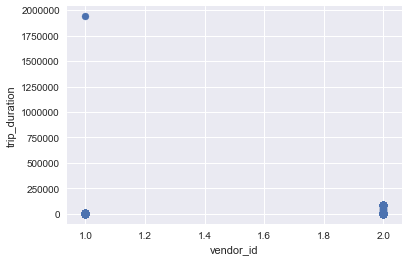

In [15]:
plt.scatter(df.vendor_id, df.trip_duration)
plt.xlabel("vendor_id")
plt.ylabel("trip_duration")
plt.show()

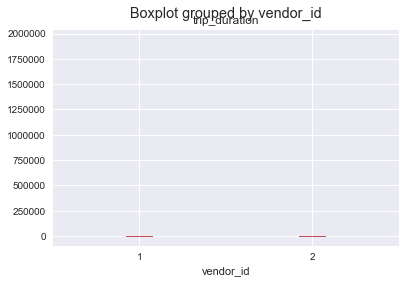

In [16]:
df.boxplot("trip_duration", "vendor_id")
plt.show()

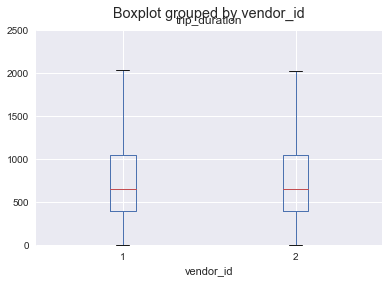

In [17]:
df.boxplot("trip_duration", "vendor_id")
plt.ylim(-10, 2500)
plt.show()

* *참고 : boxplot 보는 방법*
<img src="boxplot-1.png">
* *참고 : 그래프 저장 방법*  
from pylab import figure, axes, pie, title, savefig #savefig추가  
savefig('boxplot.png') # graph 이미지 저장

* *Sampling  (위에서 했으니까 skip)*
    * 분석하거나 그래프 그릴 때 모든 데이터를 사용할 경우 수행시간이 너무 길어짐  
이에 sample 사용

In [ ]:
month_group = df.groupby('pickup_month') # original data 확인을 위해 grouping

In [ ]:
month_group.count() # pickup_month의 variable*column별 관측치 수 확인

# size함수를 통해 pickup_month의 value별 관측치 수 확인(count와 size의 차이 : size는 NaN값을 포함해서 세고, count는 NaN값을 세지 않음)
# month_group.size().sort_values(ascending = False)

In [ ]:
# 위에서 했으므로 여기서는 실행 안함. 원래 여기서 시행해야 아래 표와 차이 발생
# df = df.sample(frac = 0.1, replace = False, random_state = 0) # sampling
# df.shape # sampling됐는지 확인

In [ ]:
# sample이 골고루 뽑혔는지 확인
# month_group.count()의 output과 비교. 월별 갯수 비중 확인

# pickup_month data 확인을 위해 grouping
month_group = df.groupby('pickup_month')
# pickup_month의 variable*column별 관측치 수 확인
month_group.count()

#### 4) data log 변환
* trip_duration의 단위는 second로 log변환 가능
* trip_duration에 +1(scaling)을 한 후 log 변환 수행  
*original 값에 +1을 하는 이유 :
original 값이 0인 경우 log변환하면 1이 되어버림 따라서, 모든 original 값에 1을 더함*
* tirp_duraiont+1을 log변환 함
* original 값과 log변환 값 비교

In [18]:
df['logtrip_duration'] = np.log(df.trip_duration + 1)

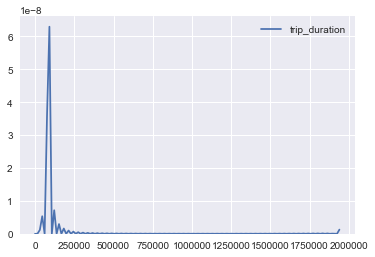

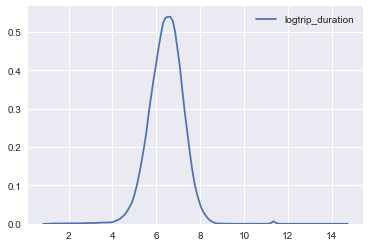

In [19]:
sns.kdeplot(df.trip_duration) # kernel density grahp (높이(x가 뽑힐 확률)는 큰 의미 없음, 넓이가 중요(넓이의 합은 1))
plt.show()

sns.kdeplot(df.logtrip_duration) # 정규분포와 더 유사한 분포가 됨
plt.show()

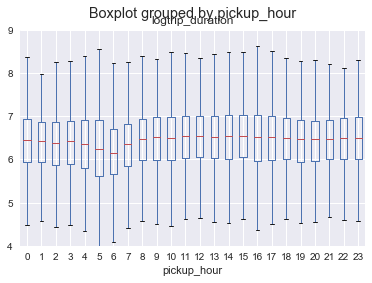

In [20]:
df.boxplot("logtrip_duration", "pickup_hour")
plt.ylim(4, 9)
plt.show()

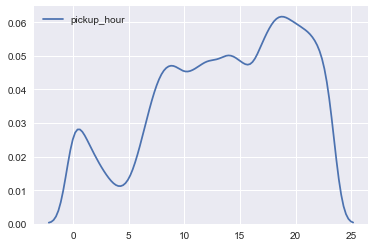

In [21]:
sns.kdeplot(df.pickup_hour) # kernel density grahp (높이(x가 뽑힐 확률)는 큰 의미 없음, 넓이가 중요(넓이의 합은 1))
plt.show()

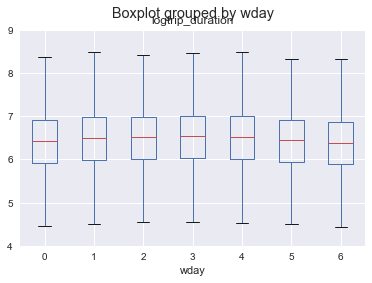

In [22]:
df.boxplot("logtrip_duration", "wday")
plt.ylim(4, 9)
plt.show()

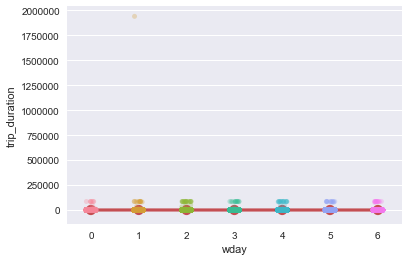

In [23]:
sns.stripplot(x="wday", y="trip_duration", data=df, jitter=True, alpha=.3)
sns.pointplot(x="wday", y="trip_duration", data=df, dodge=True, color='r')
plt.show()

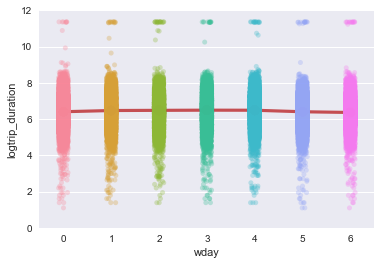

In [24]:
sns.stripplot(x="wday", y="logtrip_duration", data=df, jitter=True, alpha=.3)
sns.pointplot(x="wday", y="logtrip_duration", data=df, dodge=True, color='r')
plt.ylim(0, 12)
plt.show()

* 요일, logtrip_duration, 탑승 시각을 그래프로 확인

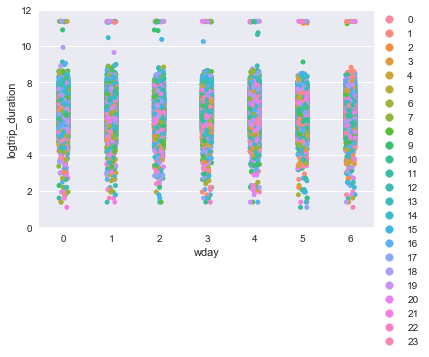

In [25]:
sns.stripplot(x="wday", y="logtrip_duration", hue = "pickup_hour", data = df, jitter = True)
plt.ylim(0, 12)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.1)
plt.show()

#### tip : 기존 dataframe에 변수를 추가했을 때 활용할 수 있는 명령어(변수명 변경, 변수 삭제, 변수 순서 변경)
* 변수명(column) 변경(rename)
    * 방법1 : df = df.rename(columns = {'oldname1' : 'newname1', 'oldname2' : 'newname2'})
    * 방법2 : df.rename(columns = {'oldname1' : 'newname1', 'oldname2' : 'newname2'}, inplace = True)
* 잘못 생성한 변수(column) 삭제(drop)
    * 방법1 : df = df.drop('column_name', axis = 1)  
    *axis = 1은 dataframe의 column을 의미(0은 row)*
    * 방법2 : df.drop('column_name', axis = 1, inplace = True)
* 변수(column) 순서 변경(order or insert)
    * 방법1 : df = df.[['column1', 'column2']]
    * 방법2 : 특정자리에 특정 변수 삽입
        * get a list of columns   
        cols = list(df)
        * move the column to head of list using index, pop and insert  
        cols.insert(0, cols.pop(cols.index('column_name')))
        * use loc to reorder(라벨을 활용할 경우 loc, 위치 index를 활용할 경우 iloc)  
        df = df.loc[:, cols]                  

In [26]:
# 변수 순서 조정
cols = list(df) # dataframe을 list로 type변환 -> 변수명만 포함한 리스트(cols) 생성
cols.insert(0, cols.pop(cols.index('trip_duration'))) # 종속변수를 잘라내어(pop) cols맨 앞(index 0)에 삽입(insert)
cols.insert(1, cols.pop(cols.index('logtrip_duration')))
cols.insert(2, cols.pop(cols.index('pickup_month_c'))) # 독립변수1를 잘라내어(pop) index 2에 삽입(insert)
cols.insert(3, cols.pop(cols.index('wday_c')))
cols.insert(4, cols.pop(cols.index('vendor_id')))
cols.insert(5, cols.pop(cols.index('pickup_day')))
cols.insert(6, cols.pop(cols.index('pickup_hour')))
cols.insert(7, cols.pop(cols.index('passenger_count')))
cols.insert(8, cols.pop(cols.index('trip_c')))
cols.insert(9, cols.pop(cols.index('pickup_month')))
cols.insert(10, cols.pop(cols.index('wday')))
df = df.loc[:, cols] # 행은 그대로, 열은 cols(변수명 리스트)로 다시 구성

#### 5) Outlier 확인 및 삭제
##### (1) Outlier를 직접 확인, 판단, 삭제
* outlier 삭제(trip_duration이 1750000초 이상인 경우 빈도가 매우 적고 숫자가 너무 커 outlier로 판단) 
* *trip_duration이 20,000초 이상(5시간 이상)인 경우는 일반적인 상황이 아닌 것(분석 data에서 제외)으로 고려하고 분석할 수 있을 것으로 판단*  

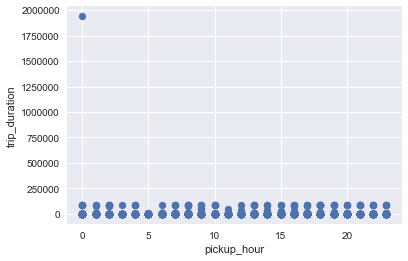

In [27]:
plt.scatter(df.pickup_hour, df.trip_duration)
plt.xlabel("pickup_hour")
plt.ylabel("trip_duration")
plt.show()

In [28]:
# 이상치라 판단되는 data확인
df[df.trip_duration >= 1750000]

# 아래의 형식으로도 확인 가능(특정 범위)
# df[(df.trip_duration >= 1750000) & (df.trip_duration <= 2000000)]

,trip_duration,logtrip_duration,pickup_month_c,wday_c,vendor_id,pickup_day,pickup_hour,passenger_count,trip_c,pickup_month,...,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_year,yday,nwday
682482,1939736,14.478063,0,0,1,5,0,1,1,1,...,2016-01-05 00:19:00,2016-01-27 11:08:00,-73.78965,40.643559,-73.95681,40.773087,N,2016,5,Tuesday


In [29]:
# 특정 관측치 삭제
#df = df.drop([682482])
#df = df.drop()(axis=0)

# 특정 범위만 grab
df = df[df.trip_duration <= 1750000]
#df[(df.trip_duration >= 1750000) & (df.trip_duration <= 2000000)]

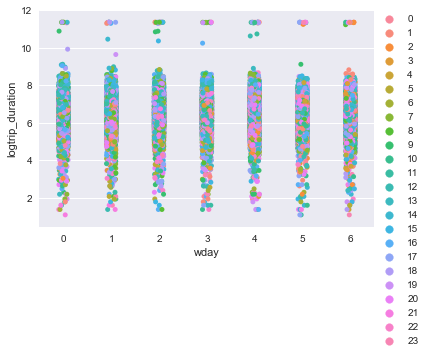

In [30]:
# 삭제되었는지 확인
sns.stripplot(x="wday", y="logtrip_duration", hue = "pickup_hour", data = df, jitter = True)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.1)
plt.show()

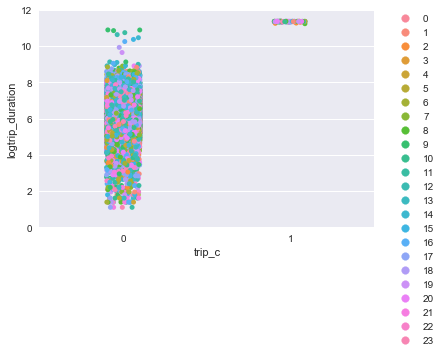

In [31]:
sns.stripplot(x="trip_c", y="logtrip_duration", hue = "pickup_hour", data = df, jitter = True)
plt.ylim(0, 12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
'''
# trip_duration과 logtrip_duration의 kernel density graph
# 아래의 sns는 너무 오래걸림
sns.distplot(df.trip_duration, kde = True, rug = True)
plt.show()
sns.distplot(df.logtrip_duration, kde = True, rug = True)
plt.show()

##### (2) OLS분석을 통해 Outlier 확인 및 삭제

* OLS를 통해 확인하는 방법
    * ols를 통해 레버리지와 잔차를 계산하여 이를 근거로 outlier 규정

In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Users\IS\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [33]:
model_taxi = smf.ols(formula = "logtrip_duration ~ C(vendor_id)  + C(wday) + C(pickup_month) + passenger_count", data = df)
result_taxi = model_taxi.fit()
print(result_taxi.summary())

                            OLS Regression Results                            
Dep. Variable:       logtrip_duration   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     35.80
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           2.13e-77
Time:                        19:44:34   Log-Likelihood:                -82314.
No. Observations:               70177   AIC:                         1.647e+05
Df Residuals:                   70165   BIC:                         1.648e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.3553 

In [72]:
model = smf.ols(formula = "logtrip_duration ~ C(vendor_id)  + C(wday) + C(pickup_hour)+ precipitation + snow_fall_y + C(pickup_month) + passenger_count + average_temperature + distance", data = df)
result = model_taxi.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       logtrip_duration   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     1281.
Date:                Tue, 17 Oct 2017   Prob (F-statistic):               0.00
Time:                        21:17:48   Log-Likelihood:                -63998.
No. Observations:               70174   AIC:                         1.281e+05
Df Residuals:                   70135   BIC:                         1.284e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.7935 

In [74]:
print("TSS = ", result.uncentered_tss)
print("ESS = ", result.mse_model)
print("RSS = ", result.ssr)
print("ESS + RSS = ", result.mse_model + result.ssr)
print("R squared = ", result.rsquared)

TSS =  2959021.09394
ESS =  464.91388377
RSS =  25458.9562936
ESS + RSS =  25923.8701774
R squared =  0.409656751965


In [77]:
import scipy as sp

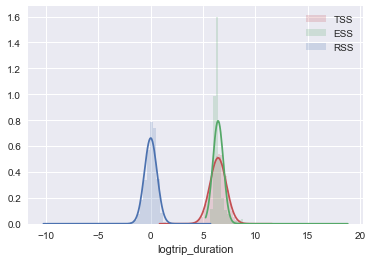

In [78]:
sns.distplot(df.logtrip_duration, 
             kde=False, fit=sp.stats.norm, hist_kws={"color": "r", "alpha": 0.2}, fit_kws={"color": "r"}, 
             label="TSS")
sns.distplot(result.fittedvalues, 
             kde=False, hist_kws={"color": "g", "alpha": 0.2}, fit=sp.stats.norm, fit_kws={"color": "g"}, 
             label="ESS")
sns.distplot(result.resid, 
             kde=False, hist_kws={"color": "b", "alpha": 0.2}, fit=sp.stats.norm, fit_kws={"color": "b"}, 
             label="RSS")
plt.legend()
plt.show()

In [73]:
sm.stats.anova_lm(result)

C:\Users\IS\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\IS\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\IS\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
C(vendor_id),1.0,9.360419,9.360419,25.786328,3.823544e-07
C(wday),6.0,154.057455,25.676242,70.733586,2.961071e-88
C(pickup_hour),23.0,341.666483,14.855064,40.923121,8.140178e-183
C(pickup_month),3.0,70.103602,23.367867,64.374413,1.472142e-41
precipitation,1.0,0.560295,0.560295,1.543515,2.140995e-01
snow_fall_y,1.0,1.909549,1.909549,5.260474,2.181801e-02
passenger_count,1.0,4.933687,4.933687,13.591449,2.273893e-04
average_temperature,1.0,11.697318,11.697318,32.224077,1.379183e-08
distance,1.0,17072.438777,17072.438777,47031.601760,0.000000e+00
Residual,70135.0,25458.956294,0.362999,NaN,NaN


In [69]:
import os

In [70]:
import xgboost as xgb

In [62]:
df.snow_fall_y

0        0.5
1        0.5
2        0.5
3        0.5
4        0.5
5        0.5
6        0.5
7        0.5
8        0.5
9        0.5
10       0.5
11       0.5
12       0.5
13       0.5
14       0.5
15       0.5
16       0.5
17       0.5
18       0.5
19       0.5
20       0.5
21       0.5
22       0.5
23       0.5
24       0.5
25       0.5
26       0.5
27       0.5
28       0.5
29       0.5
        ... 
70144    0.0
70145    0.0
70146    0.0
70147    0.0
70148    0.0
70149    0.0
70150    0.0
70151    0.0
70152    0.0
70153    0.0
70154    0.0
70155    0.0
70156    0.0
70157    0.0
70158    0.0
70159    0.0
70160    0.0
70161    0.0
70162    0.0
70163    0.0
70164    0.0
70165    0.0
70166    0.0
70167    0.0
70168    0.0
70169    0.0
70170    0.0
70171    0.0
70172    0.0
70173    0.0
Name: snow_fall_y, Length: 70174, dtype: float64

### Temp ols
* StatsModels를 사용한 ols

In [ ]:
x = cols[2:3] # feature x1
y = cols[1:2] # target list

In [ ]:
dfX0 = pd.DataFrame(df, columns = x) # feature dataframe 생성
# add_constant는 y절편을 의미(모형에서 상수값), 이를 생성하지 않을경우 y절편이 0으로 고정되어 모형이 왜곡됨
dfX = sm.add_constant(dfX0) # 값을 1로 갖는 column vector를 생성하여 X dataframe에 추가
dfy = pd.DataFrame(df, columns = y) # feature dataframe 생성

In [ ]:
from patsy import dmatrix

In [ ]:
from scipy import stats
df[(np.abs(stats.zscore(df)) < 3).all(axis = 1)]

In [ ]:
# 탄 시간, 일, 월, 연도를 카테고리 타입의 변수로 생성
df['pickup_hour'] = df.pickup_datetime.dt.hour.astype('int')
df['pickup_day'] = df.pickup_datetime.dt.day.astype('int')
df['pickup_month'] = df.pickup_datetime.dt.month.astype('int')
df['pickup_year'] = df.pickup_datetime.dt.year.astype('int')

In [ ]:
# 연도, 주 기준 변수 생성
df['yday'] = df.pickup_datetime.dt.dayofyear.astype('int')
df['wday'] = df.pickup_datetime.dt.dayofweek.astype('int')
df['nwday'] = df.pickup_datetime.dt.weekday_name.astype('str')

In [ ]:
df.vendor_id = df.vendor_id.astype('category') # vendor_id type category
df.vendor_id.dtype

In [ ]:
plt.scatter(df.yday, df.logtrip_duration)
plt.show()

In [ ]:
plt.scatter(df.yday, df.trip_duration)
plt.ylim(0, 7000)
plt.show()

In [ ]:
model = smf.ols(formula = "logtrip_duration ~ yday", data = df)
result = model.fit()
print(result.summary())

In [ ]:
model = smf.ols(formula = "logtrip_duration ~ C(pickup_month)", data = df)
result = model.fit()
print(result.summary())

In [ ]:
def test_var_args(f_arg, *argv):
    print ("first normal arg:", f_arg)
    for arg in argv:
        print ("another arg through *argv :", arg)

test_var_args('yasoob','python','eggs','test')

In [ ]:
from scipy import stats
df[(np.abs(stats.zscore(df.trip_duration)) < 3).all(axis=1)]

In [ ]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

In [ ]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

In [ ]:
print("hat.sum() =", hat.sum())

In [ ]:
temp = sm.get_leverage_resid2(result).df
temp.head()

In [ ]:
sm.graphics.plot_ccpr(result, df.wday, ax=a.empty)
plt.show()

In [ ]:
ax = plt.subplot()
plt.scatter(df.wday, df.logtrip_duration)
sm.graphics.abline_plot(model_results=result, ax=ax)

idx = hat > 0.05
plt.scatter(df.wday[idx], df.logtrip_duration[idx], s=300, c="r", alpha=0.5)
plt.show()

In [ ]:
model_chas = sm.OLS.from_formula("logtrip_duration ~ C(wday)", data=df)
sm.stats.anova_lm(model_chas.fit())

* time-series data outlier 확인  
[참고사이트](https://ocefpaf.github.io/python4oceanographers/blog/2015/03/16/outlier_detection/)

In [ ]:
def get_median_filtered(signal, threshold=3):
    signal = signal.copy()
    difference = np.abs(signal - np.median(signal))
    median_difference = np.median(difference)
    if median_difference == 0:
        s = 0
    else:
        s = difference / float(median_difference)
    mask = s > threshold
    signal[mask] = np.median(signal)
    return signal

In [ ]:
figsize = (7, 2.75)
kw = dict(marker='o', linestyle='none', color='r', alpha=0.3)

df['trip_duration_medf'] = get_median_filtered(df.trip_duration.values, threshold=3)

outlier_idx = np.where(df['trip_duration_medf'].values != df.trip_duration.values)[0]

fig, ax = plt.subplots(figsize=figsize)
df.trip_duration.plot()
df.trip_duration[outlier_idx].plot(**kw)
_ = ax.set_ylim(0, 100000)
plt.show()

In [ ]:
df.plt.scatter('pickup_datetime1', 'trip_duration')
plt.show()

In [ ]:
plt.scatter(df.pickup_datetime1, df.trip_duration)
plt.xlabel("pickup")
plt.ylabel("trip_duration")
plt.show()

* OLS를 통한 outlier 확인

In [ ]:
from sklearn.datasets import make_regression
import statsmodels.formula.api as sm

In [ ]:
dfX0 = pd.DataFrame(df, columns = x) # feature dataframe 생성
# add_constant는 y절편을 의미(모형에서 상수값), 이를 생성하지 않을경우 y절편이 0으로 고정되어 모형이 왜곡됨
dfX = sm.add_constant(dfX0) # 값을 1로 갖는 column vector를 생성하여 X dataframe에 추가
dfy = pd.DataFrame(df, columns = y) # feature dataframe 생성

In [ ]:
dfX.tail()

In [ ]:
from patsy import dmatrix

In [ ]:
dmatrix("df.wday")

In [ ]:
model = sm.OLS.from_formula("logtrip_duration ~ yday + 0", df)
result = model.fit()
print(result.summary())

In [ ]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

In [ ]:
print("hat.sum() =", hat.sum())

In [ ]:
model = smf.OLS(dfy, dfX)
result = model.fit()
print(result.summary())

In [ ]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

In [ ]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

In [ ]:
# pickup_month data histogram
plt.hist(df.wday)
plt.show()

In [ ]:
plt.hist(df.pickup_month)
plt.show()

In [ ]:
plt.hist(x, bins=None, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None, **kwargs)

In [ ]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize = (10, 2))
plt.stem(hat)
plt.show()

In [ ]:
plt.figure(figersize=(10, 2))
plt.stem(result.)

In [ ]:
sns.rugplot(taxi_df.trip_duration)
plt.show()

In [ ]:
sns.kdeplot(taxi_df.trip_duration)
plt.show()

In [ ]:
sns.distplot(taxi_df.trip_duration, kde = True)
plt.show()

In [ ]:
newdf = df.copy()
trip_duration = newdf.groupby('trip_duration')
newdf[np.abs(newdf.trip_duration - newdf.trip_duration.mean()) <= (3 * newdf.trip_duration.std())]
newdf['outlier'] = trip_duration.transform(lambda x: abs(x - x.mean()) > 1.96 * x.std())

In [ ]:
newdf

In [ ]:
plt.scatter(taxi_df.vendor_id, taxi_df.trip_duration)

In [ ]:
# vendor_id와 trip_duration간 scatter graph 
plt.scatter(len(taxi_df.vendor_id), taxi_df.trip_duration)

In [ ]:
plt.scatter(taxi_df.vendor_id, taxi_df.trip_duration)
plt.ylim(1930000, 1950000)

In [ ]:
plt.scatter(taxi_df.vendor_id, taxi_df.trip_duration)
plt.ylim(0, 150000)

In [ ]:
plt.scatter(taxi_df.pickup_latitude, taxi_df.pickup_longitude, s = taxi_df.trip_duration)

In [ ]:
mpl.rcParams['agg.path.chunksize'] = 10000

In [ ]:
# pickup_month data 확인을 위해 grouping
month_group = df.groupby('pickup_month')

In [ ]:
# pickup_month의 value*column별 관측치 수 확인
month_group.count()

In [ ]:
# size함수를 통해 pickup_month의 value별 관측치 수 확인(count와 size의 차이 : size는 NaN값을 포함해서 세고, count는 NaN값을 세지 않음)
month_group.size().sort_values(ascending = False)

In [ ]:
df.head()

* 2016년 뉴욕 날씨 데이터를 입력하여 yday를 기준변수로 활용하여 기존 data frame에 merge함

In [34]:
# 2016년 뉴욕 날씨 데이터 입력
wdf = pd.read_csv('weather_data_nyc_centralpark_2016.csv')

In [35]:
wdf['date'] = pd.to_datetime(wdf.date,format='%d-%m-%Y')
wdf['yday'] = wdf.date.dt.dayofyear
# wdf['wday'] = wdf.date.dt.dayofweek
# wday변수는 wdf에서 안만들어도 될 것 같아서 만들지 않음
# merge하는데 필요한 기준 변수는 1개면 충분하다고 판단함

In [41]:
# data확인결과 pricipitation 등의 변수에 숫자가 아닌 T가 있음
wdf.head(10)
# T는 측정되지 않았으나 비가왔던 흔적을 의미함
#"T" stands for "trace", used when precipitation has been detected, but it isn't sufficient to measure meaningfully.

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,yday
0,2016-01-01,42,34,38.0,0.0,0.0,0,1
1,2016-01-02,40,32,36.0,0.0,0.0,0,2
2,2016-01-03,45,35,40.0,0.0,0.0,0,3
3,2016-01-04,36,14,25.0,0.0,0.0,0,4
4,2016-01-05,29,11,20.0,0.0,0.0,0,5
5,2016-01-06,41,25,33.0,0.0,0.0,0,6
6,2016-01-07,46,31,38.5,0.0,0.0,0,7
7,2016-01-08,46,31,38.5,0.0,0.0,0,8
8,2016-01-09,47,40,43.5,0.0,0.0,0,9
9,2016-01-10,59,40,49.5,1.8,0.0,0,10


In [57]:
# T를 아주 작은 수로 바꿔줌(여기서는 0.01로 변경)
falls = [ 0 if c=='T' else float(c) for c in wdf['snow fall']]
rain = [ 0 if c=='T' else float(c) for c in wdf['precipitation']]
wdf['snow_fall']= falls
wdf['precipitation'] = rain
wdf = wdf.rename(columns = {'average temperature' : 'average_temperature'})

In [58]:
# 'yday' 변수를 기준변수로 taxi_df에 wdf를 merge함
# (yday를 기준으로 taxi_df에 wdf의 data를 가로로 붙인다.)
df = pd.merge(df,wdf,on='yday')
df

# 필요없는 변수 삭제(maximum과 minimum은 같은 지역으로 다 같기 때문에 삭제)
df = df.drop(['date','maximum temperature','minimum temperature'], axis=1)
df.head()

,trip_duration,logtrip_duration,pickup_month_c,wday_c,vendor_id,pickup_day,pickup_hour,passenger_count,trip_c,pickup_month,...,average temperature_y,precipitation_y,snow fall_y,snow depth_y,snow_fall_x,average_temperature,precipitation,snow fall,snow depth,snow_fall_y
0,1000,6.908755,1,1,1,21,14,1,0,3,...,41.0,0.06,0.5,T,0.5,41.0,0.06,0.5,T,0.5
1,1014,6.922644,1,1,1,21,12,1,0,3,...,41.0,0.06,0.5,T,0.5,41.0,0.06,0.5,T,0.5
2,3949,8.281471,1,1,1,21,16,1,0,3,...,41.0,0.06,0.5,T,0.5,41.0,0.06,0.5,T,0.5
3,251,5.529429,1,1,1,21,15,1,0,3,...,41.0,0.06,0.5,T,0.5,41.0,0.06,0.5,T,0.5
4,844,6.739337,1,1,2,21,17,1,0,3,...,41.0,0.06,0.5,T,0.5,41.0,0.06,0.5,T,0.5


In [53]:
df.snow fall.head()

SyntaxError: invalid syntax (<ipython-input-53-f7a7e7366643>, line 1)

 ##### (2) 공간변수(or 지도정보, 위치정보) 사용 
  * 지도정보(위치정보)를 활용하기 위해서는 folium(포리움)함수를 사용해야 함

In [42]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [43]:
df['distance'] = haversine_np(df.pickup_longitude, df.pickup_latitude,
                                           df.dropoff_longitude, df.dropoff_latitude)

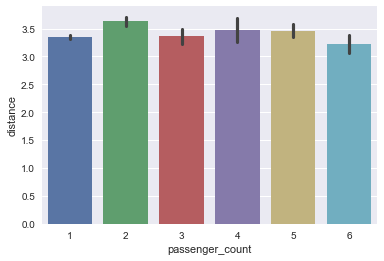

In [50]:
import seaborn as sns
#sns.set(style="ticks")
sel = df[['distance','passenger_count']]
sns.barplot(x='passenger_count',y='distance',data=sel)
#sns.despine(offset=10, trim=True)
plt.show()

In [47]:
# 이상치라 판단되는 data확인
df[df.passenger_count == 0]

# 아래의 형식으로도 확인 가능(특정 범위)
# df[(df.trip_duration >= 1750000) & (df.trip_duration <= 2000000)]

,trip_duration,logtrip_duration,pickup_month_c,wday_c,vendor_id,pickup_day,pickup_hour,passenger_count,trip_c,pickup_month,...,snow depth_x,average temperature_y,precipitation_y,snow fall_y,snow depth_y,average temperature,precipitation,snow fall,snow depth,distance
848,2251,7.719574,0,0,1,4,12,0,0,1,...,0,25.0,0.00,0.0,0,25.0,0.00,0.0,0,12.950165
59361,15,2.772589,0,0,2,5,18,0,0,1,...,0,20.0,0.00,0.0,0,20.0,0.00,0.0,0,0.005934
64357,45,3.828641,0,0,1,1,0,0,0,2,...,2,51.5,0.01,0.0,2,51.5,0.01,0.0,2,0.000000


In [48]:
# 특정 관측치 삭제
df = df.drop([848])
df = df.drop([59361])
df = df.drop([64357])
#df = df.drop()(axis=0)

# 특정 범위만 grab
#df = df[df.trip_duration <= 1750000]
#df[(df.trip_duration >= 1750000) & (df.trip_duration <= 2000000)]

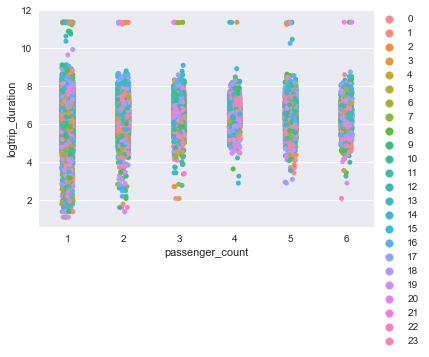

In [49]:
# 삭제되었는지 확인
sns.stripplot(x="passenger_count", y="logtrip_duration", hue = "pickup_hour", data = df, jitter = True)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.1)
plt.show()

In [ ]:
# Read in the airports data.
pickup = pd.read_csv("train.csv", dtype=str)

In [ ]:
pickup.head()

In [ ]:
import folium

# Get a basic world map.
taxi_map = folium.Map(location=[30, 0], zoom_start=2)
# Draw markers on the map.
for name, row in airports.iterrows():
    # For some reason, this one airport causes issues with the map.
    if row["vendor_id"] != "South Pole Station":
        taxi_map.circle_marker(location=[row["latitude"], row["longitude"]], popup=row["name"])
# Create and show the map.
airports_map.create_map('airports.html')
airports_map

In [ ]:
# Read in the airlines data.
pickup = pd.read_csv("airlines.csv", header=None, dtype=str)
airlines.columns = ["id", "name", "alias", "iata", "icao", "callsign", "country", "active"]

In [ ]:
# Read in the airports data.
pickup = pandas.read_csv("train.csv", dtype=str)

# Read in the airlines data.
airlines = pandas.read_csv("airlines.csv", header=None, dtype=str)
airlines.columns = ["id", "name", "alias", "iata", "icao", "callsign", "country", "active"]
# Read in the routes data.
routes = pandas.read_csv("routes.csv", header=None, dtype=str)
routes.columns = ["airline", "airline_id", "source", "source_id", "dest", "dest_id", "codeshare", "stops", "equipment"]

In [ ]:
location_df = pd.DataFrame(columns = ['pickup_latitude','pickup_longitude'])

ctr = 0
for place in query_result.places:
    for key, item in place.geo_location.items():
        df.loc[ctr, key] = item
    ctr += 1

In [ ]:
taxi_df['pickup_locations'] = taxi_df['pickup_latitude', 'pickup_longitude']

### 3. Data Analysis
#### 1) 변수간 상관관계 분석
* (temp) 독립변수(ex.pickup_month_c)와 종속변수(ex.trip_duration)의 상관관계 확인
* 상관계수 해석
    * +값은 비례, -값은 반비례를 의미
    * 상관계수의 크기에 따른 해석은 관행적으로 이뤄지는 것으로, 이론적 근거는 없음
        * 1.0 ~ 0.7 매우 강한 관련성
        * 0.7 ~ 0.4 상당한 관련성
        * 0.4 ~ 0.2 약간의 관련성
        * 0.2 ~ 0.0 관련성 없음

In [ ]:
# 설명변수 type이 int나 float와 같은 real변수일 경우
df[['trip_duration','passenger_count']].corr()

In [ ]:
# category변수일 경우(p-value를 소수점 2자리로 나오게 하는 방법 필요할 듯)
from scipy.stats import spearmanr, kendalltau, pearsonr
spearmanr(df['logtrip_duration'], df['pickup_hour'])

In [ ]:
#correlation 확인
df['logtrip_duration'].corr(df['pickup_month'])

In [ ]:
#correlation 확인
df['logtrip_duration'].corr(df['wday'])

In [ ]:
#correlation 확인
df['logtrip_duration'].corr(df['wday'])

In [ ]:
df.corr()

In [ ]:
df.values

In [ ]:
df.head()

In [ ]:
taxi_df['pickup_month'].value_counts()

In [ ]:
pickup_date_group = taxi_df.groupby(lambda pickup_datetime : pickup_datetime.split(' ')[0])
pickup_date_group.head()

In [ ]:
taxi_df.reset_index(inplace=True)

In [ ]:
taxi_df.head()

In [ ]:
taxi_df.shape

In [ ]:
taxi_df.head()

In [ ]:
taxi_df.describe()

In [ ]:
taxi_df.info()

In [ ]:
dfy = df.ix[:,1:2]
dfX = df.ix[:,2:9]
print(len(dfy.columns), len(dfX.columns))

In [ ]:
dfy.tail()

In [ ]:
dfX.tail()

In [ ]:
df.head()

In [ ]:
cols_real = ['passenger_count']

In [ ]:
cols_cat = ['vendor_id', 'pickup_month', 'wday', 'pickup_hour', 'category_trip']

In [ ]:
dfX_real = dfX[cols_real]
print(len(dfX_real.columns))
dfX_real.tail()

In [ ]:
dfX_cat = dfX[cols_cat]
print(len(dfX_cat.columns))
dfX_cat.tail()

In [ ]:
print(plt.style.available)

In [ ]:
for i in range(0, len(cols_real), 4):
    print("dfX{}".format(cols_real[i: i+4]))

In [ ]:
sns.barplot(x="pickup_datetime", y="trip_duration", data=df)

##### (참고) datetime variable 조정
* pandas의 datetimeIndex로 datetime변수를 만들면 보통 시간(초(second) 단위)까지 생성됨
* datetime변수가 날짜만 필요할 때 활용
    1. old_datetime variable을 str type으로 변경
    1. 필요한 단위까지 slicing해서 new_datetime 변수 생성
    1. datetime type으로 변경
***
* time-series graph 그릴때 datetime 변수를 index로 설정

    * datetime 변수를 index로 설정  
df = df.set_index('datetime_variable')

    * index 초기화(index로 사용되던 변수를 column으로 보내고, 다시 본래 index)  
df = df.reset_index() # index reset

In [ ]:
'''
# pickuptime variable을 일까지의 단위로 조정

df.pickup_datetime = df.pickup_datetime.astype(str)
df['pickup_datetime1'] = df.pickup_datetime.str[:7] # 시간까지만 pickup_datetime
df.pickup_datetime1 = pd.to_datetime(df.pickup_datetime1)
'''

In [ ]:
df = df.set_index('pickup_datetime1') # pickup_datetime1을 index로 설정

In [ ]:
df = df.reset_index() # index reset

##### 참고 : Pandas의 DatetimeIndex와 Python의 Datetime Package는 다름

> Python의 Datetime을 활용해 단위를 변경하는 명령어는 week와 관련된 명령어(weekday(), isoweekday()) 밖에 없음  
year와 month등을 기준(ex.1년 365일 중 4월 30일이 몇 번째 날)으로 datatime type 변수의 단위를 변경하기 위해서는 timetuple이나 strftime를 적용하여 사용하는 방법이 따로 적혀있음.   
그런데 dt.dayofyear, dayofweek, dayofmonth 등의 명령어가 실행이 됨.
[google 검색 결과](https://stackoverflow.com/questions/15707532/python-import-datetime-v-s-from-datetime-import-datetime)에서 import datetime as dt한 것을 보고 dt를 python의 datetime package로 오해함.  
그러나 참고한 자료에서는 import datetime 자체를 하지 않음.  
dt는 python의 datetime를 의미할 수도 있지만 여기서는 아닌 pandas의 **DatetimeIndex**를 의미함  

####### (2) Use the Datetime Package
* **Datatime Package를 이용해 연, 월, 일 변수 생성  **
    * datatime package 설치 : import datetime
    * df['option 기준 변수명'] = df['datetime_type_variable_name'].datetime.option  
        * option(year, month, day, houre, minut, second 등)
            * dataframe_name['시간 기준 변수명'] = dataframe_name['기존변수명'].datetime.hour  
            * dataframe_name['연 기준 변수명'] = dataframe_name['기존변수명'].datetime.year
        * option에 따라 변수값의 기준이 달라짐  
    MINYEAR <= year <= MAXYEAR,  
    1 <= month <= 12,  
    1 <= day <= number of days in the given month and year,  
    0 <= hour < 24,  
    0 <= minute < 60,  
    0 <= second < 60,  
    0 <= microsecond < 1000000,  
    fold in [0, 1].  
---
* **Datetime Package의 timetuple 또는 strftime module을 활용한 단위 변경  **
> *패키지(Packages)는 도트(.)를 이용하여 파이썬 모듈을 계층적(디렉터리 구조)으로 관리할 수 있게 해준다. 예를 들어 모듈명이 A.B인 경우 A는 패키지명이 되고 B는 A 패키지의 B 모듈이 된다.  *



    * datetime package만을 활용한 단위 변경
        * week 기준 day 산출(7일 중 몇 번째 일(요일을 알 수 있음))  
            * df['week 단위 변수명'] = df['기존변수명'].dt.weekday   
            df['week 단위 변수명'] = df['기존변수명'].dt.isoweekday  
            df['week 단위 변수명'] = df['기존변수명'].dt.weekday_name 
> weekday : monday == 0 ... sunday == 6  
            isoweekday : monday == 1 ... sunday == 7   
            weekday_name : monday == monday ... sunday == sunday  
        * year 기준 day 산출(해당년 첫번째날(1월 1일) == 1을 기준으로 1년 중 몇 번째 일인지 알 수 있음)  
       > df['year 단위 변수명'] = df['기존변수명'].dt.dayofyear   
 
        * month 기준 day 산출(해당월 첫번째 날 == 1을 기준으로 해당 월 중 몇 번째 일인지 알 수 있음)  
       > df['month 단위 변수명'] = df['기존변수명'].dt.dayofmonth  
        * dayofweek도 실행됨
---
* 참고
    * timetuple 활용
        * df['new_variable'] = df['datetime_variable'].dt.timetuple(option)
        * option : d.year, d.month, d.day, d.hour, d.minute, d.second, d.weekday(), yday, dst  
    MINYEAR <= year <= MAXYEAR  
    1 <= month <= 12  
    1 <= day <= number of days in the given month and year 
    * strftime 활용
        * df['new_variable'] = df['datetime_variable'].dt.strftime('%j')  
        %j는 c언어로 day of the year as a zero-padded decimal number를 의미함  
        pandas datetimeindex의 dayofyear와 같음

In [ ]:
import datetime
taxi_df['temp'] = taxi_df['pickup_datetime'].dt.strftime('%j')

* ols 참고 더미변수 중 기준 바꾸기

In [ ]:
model_taxi = smf.ols(formula = "logtrip_duration ~ C(vendor_id)  + C(wday) + passenger_count + C(pickup_month, Treatment(reference=2))", data = df)
result_taxi = model_taxi.fit()
print(result_taxi.summary())